In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import LSF
from spectacle.analysis import statistics as stats
import numpy as np

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]

# Equivalent Width Analysis
This is an overplot of the Balmer and Lyman absorption lines.

## Balmer Series

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


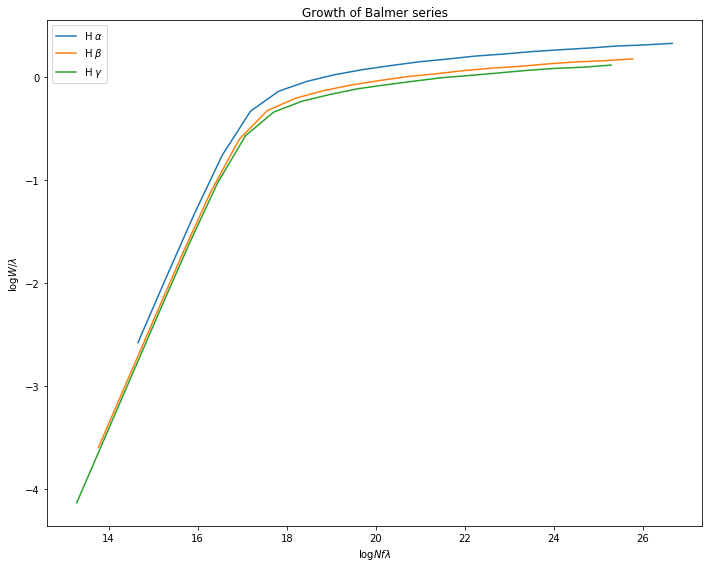

In [3]:
f, ax = plt.subplots(1, 1)

for lam, f, name in [(6.5646230e+02, 6.9580000e-01, r"H $\alpha$"), 
                     (4.8626880e+02, 1.2180000e-01, r"H $\beta$"), 
                     (4.3416900e+02, 4.4370000e-02, r"H $\gamma$")]:
    log_n, log_w = [], []
    
    for n in np.logspace(12, 24, 20):
        # Create spectrum
        spectrum = Spectrum1D()
        spectrum.add_line(lambda_0=lam, f_value=f, v_doppler=1e7, column_density=n)

        # Append values to lists
        log_n.append(np.log10(n * f * (lam)))
        ew, ew_uncert = spectrum.equivalent_width()
        log_w.append(np.log10(ew))
    
    ax.plot(log_n, log_w, label=name)
    ax.set_title("Growth of Balmer series")
    
ax.set_xlabel("$\log N f \lambda$")
ax.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
plt.legend(loc=0)
plt.tight_layout()
plt.show()

## Lyman series

<IPython.core.display.Javascript object>


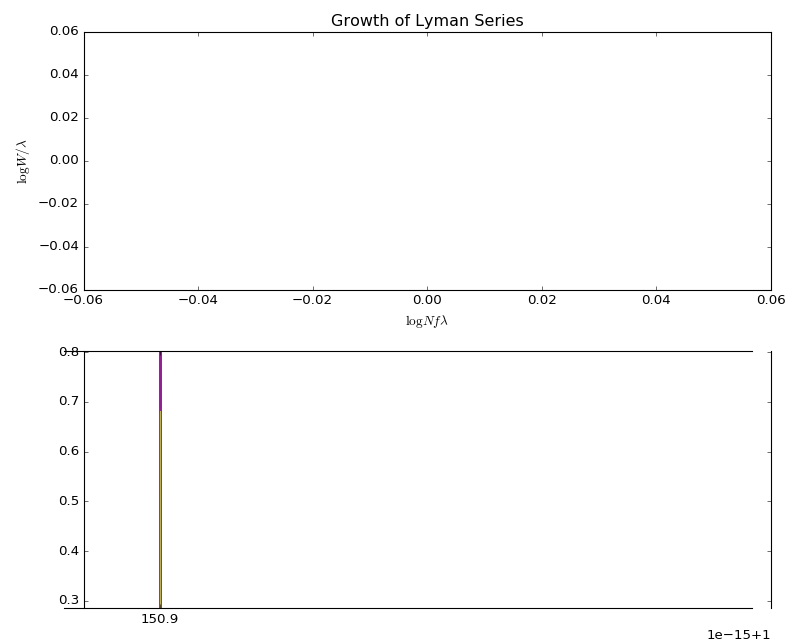

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [3]:
f, (ax1, ax2) = plt.subplots(2, 1)

for lam, f, name in [(1.2156701e+03, 4.1640000e-01, r"L $\alpha$"), 
                     (1.0257223e+03, 7.9120000e-02, r"L $\beta$"), 
                     (9.7253680e+02, 2.9000000e-02, r"L $\gamma$"),
                     (9.4974310e+02, 1.3940000e-02, r"L $\delta$"),
                     (9.3780350e+02, 7.7990000e-03, r"L $\epsilon$")]:
    log_n, log_w = [], []
    
    for n in np.logspace(12, 24, 20):
        # Create spectrum
        spectrum = Spectrum1D(np.ones(1000))
        
        # Create model
        model = Absorption1D()
        model.add_line(lambda_0=lam, f_value=f, v_doppler=1e7, column_density=n)
        
        spectrum = model(np.ones(1000))

        # Append values to lists
        log_n.append(np.log10(n * f * (lam)))
        ew, ew_uncert = stats.equivalent_width(spectrum)
        print(ew, ew_uncert)
        log_w.append(np.log10(ew))
        
        ax2.plot(spectrum.dispersion, spectrum.data)
    
    ax1.plot(log_n, log_w, label=name)
    ax1.set_title("Growth of Lyman Series")
    
ax1.set_xlabel("$\log N f \lambda$")
ax1.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
plt.legend(loc=0)
plt.tight_layout()
plt.show()